In [1]:
import os
import data_processing
from embeddings import perform_nmf, perform_pca, perform_svd
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.model_selection import train_test_split

/Users/ncantalupa/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [26]:
ratings_full = pd.read_csv("data/ratings.csv")

In [27]:
ratings_full.shape

(797605, 1002)

In [28]:
user_subset = pd.read_csv("data/user_subset.csv")

ratings = ratings_full[ratings_full['user_id'].isin(user_subset['user_id'])]
ratings

,Unnamed: 0,user_id,19,43,49,51,66,80,100,126,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
2,2,2,0,0,0,3,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,7,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,20,20,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,23,23,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797514,797514,876041,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797520,797520,876048,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797528,797528,876056,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797587,797587,876124,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
ratings = ratings.drop("Unnamed: 0", axis=1)
ratings

,user_id,19,43,49,51,66,80,100,126,134,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
2,2,0,0,0,3,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797514,876041,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797520,876048,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797528,876056,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797587,876124,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
ratings_indexs = list(ratings["user_id"])

In [55]:
train_ids, test_ids = train_test_split(ratings_indexs, train_size=0.9, random_state=15)
train_ids = list(train_ids)
train_ids.sort()
test_ids = list(test_ids)
test_ids.sort()

In [56]:
train_ids = pd.DataFrame({"user_id":train_ids})
train_ids.to_csv("output/users_train_ids.csv", index=False)
test_ids = pd.DataFrame({"user_id":test_ids})
test_ids.to_csv("output/users_test_ids.csv", index=False)

In [58]:
ratings_train = ratings[ratings["user_id"].isin(train_ids["user_id"])]
ratings_train

,user_id,19,43,49,51,66,80,100,126,134,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
2,2,0,0,0,3,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797514,876041,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797520,876048,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797528,876056,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797587,876124,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
ratings_test = ratings[ratings["user_id"].isin(test_ids["user_id"])]
ratings_test

,user_id,19,43,49,51,66,80,100,126,134,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
78,78,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,98,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,238,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,372,0,0,2,0,0,0,0,0,0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,552,0,0,0,0,0,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796270,874597,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796714,875116,0,5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796857,875276,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796991,875435,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
ratings_train = ratings_train.drop('user_id', axis=1)
ratings_train

,19,43,49,51,66,80,100,126,134,138,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
2,0,0,0,3,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797514,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797520,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797528,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797587,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
perform_pca(ratings_train, 'user_sub_ratings')

In [62]:
perform_svd(ratings_train, 'user_sub_ratings')

In [ ]:
# from scipy.sparse import csr_matrix
# sparse_ratings = csr_matrix(ratings.to_numpy())
# perform_nmf(sparse_ratings, 'user_sub_ratings')

<AxesSubplot:xlabel='pc', ylabel='explained_variance_ratio'>

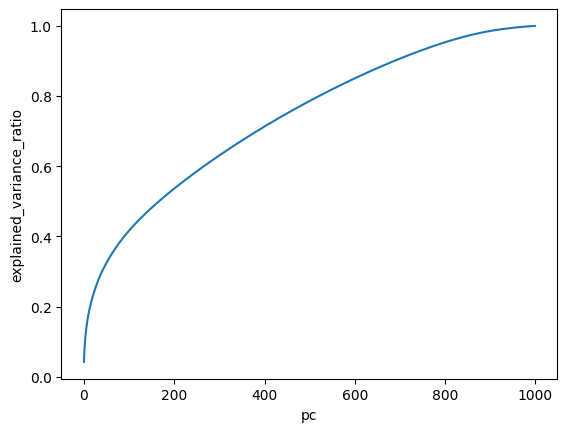

In [63]:
pca_info = pd.read_csv('user_sub_ratings_pca_info.csv')
pca_info = pca_info.reset_index().rename(columns={'index': 'pc'})
sns.lineplot(x=pca_info['pc'], y=np.cumsum(pca_info['explained_variance_ratio']))

In [72]:
pc = 0
for x in np.cumsum(pca_info['explained_variance_ratio']):
    if x >= 0.85:
        print(f'85% Explained Variance at PC_{pc}')
        break
    pc += 1

85% Explained Variance at PC_599


In [65]:
pca_comp = pd.read_csv("user_sub_ratings_pca_components.csv")

In [67]:
pca_comp.shape

(44280, 1000)

In [74]:
pca_comp_599 = pca_comp.iloc[:, 0:599]
pca_comp_599.shape

(44280, 599)

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

labels = {}
inertias = {}
sils = []
n_range = range(2,21)
for k in n_range:
    model = KMeans(n_clusters=k, random_state=41)
    model.fit(pca_comp_599)
    labels[k] = model.labels_
    inertias[k] = model.inertia_
    sils.append(silhouette_score(pca_comp_599,model.labels_, metric='cosine'))
    print(f'Model M_{k} finished')

Model M_2 finished
Model M_3 finished
Model M_4 finished
Model M_5 finished
Model M_6 finished
Model M_7 finished
Model M_8 finished
Model M_9 finished
Model M_10 finished
Model M_11 finished
Model M_12 finished
Model M_13 finished
Model M_14 finished
Model M_15 finished
Model M_16 finished
Model M_17 finished
Model M_18 finished
Model M_19 finished
Model M_20 finished


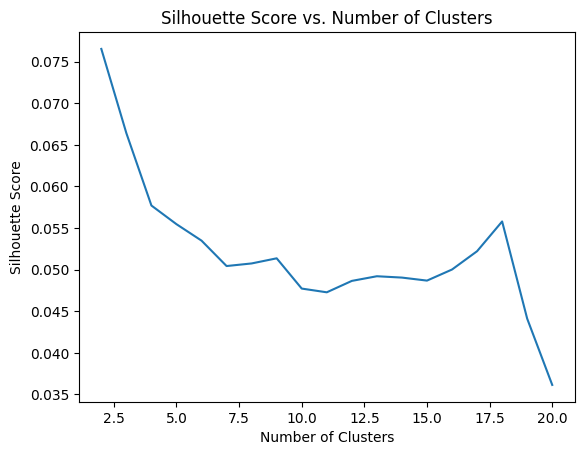

In [77]:
plt.plot(n_range, sils)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [79]:
kmeans_inertias = pd.DataFrame({'k': [x for x in range(2, 21)], 'inertia': [y for x, y in inertias.items()]})
kmeans_inertias.to_csv('user_sub_kmeans_inertias.csv')

In [80]:
kmeans_labels = pd.DataFrame(labels)

In [81]:
kmeans_labels.to_csv('user_sub_kmeans_labels.csv')

In [82]:
train_ids

,user_id
0,2
1,7
2,8
3,20
4,23
...,...
44275,876041
44276,876048
44277,876056
44278,876124


In [84]:
ratings_train.to_csv("users_ratings_train.csv", index=False)
ratings_test.to_csv("users_ratings_test.csv", index=False)


In [83]:
labels_df = pd.read_csv("user_sub_kmeans_labels.csv")
labels_df.shape

(44280, 20)

In [85]:
ids_w_clusters = pd.concat([train_ids, labels_df], axis=1)
ids_w_clusters.head()

,user_id,Unnamed: 0,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2,0,0,1,3,3,3,3,3,3,...,3,11,11,11,11,11,11,11,11,11
1,7,1,0,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,8,2,1,1,1,1,1,1,4,4,...,1,1,1,4,1,4,4,4,4,4
3,20,3,0,1,3,3,5,5,7,7,...,7,7,7,7,7,15,15,15,15,15
4,23,4,0,2,2,2,2,4,5,5,...,5,5,5,5,5,5,16,5,16,16


In [86]:
ids_w_clusters = ids_w_clusters.drop("Unnamed: 0", axis=1)

In [91]:
ids_w_clusters

,user_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2,0,1,3,3,3,3,3,3,3,3,11,11,11,11,11,11,11,11,11
1,7,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,8,1,1,1,1,1,1,4,4,1,1,1,1,4,1,4,4,4,4,4
3,20,0,1,3,3,5,5,7,7,7,7,7,7,7,7,15,15,15,15,15
4,23,0,2,2,2,2,4,5,5,2,5,5,5,5,5,5,16,5,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,876041,0,2,2,2,2,2,2,2,2,2,2,2,2,2,13,11,11,2,2
44276,876048,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44277,876056,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44278,876124,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [88]:
ratings_train

,19,43,49,51,66,80,100,126,134,138,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
2,0,0,0,3,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797514,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797520,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797528,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797587,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
ratings_train = pd.concat([train_ids["user_id"], ratings_train], axis=1)
ratings_train

,user_id,19,43,49,51,66,80,100,126,134,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
0,2,0,0,0,3,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,876041,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44276,876048,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44277,876056,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44278,876124,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


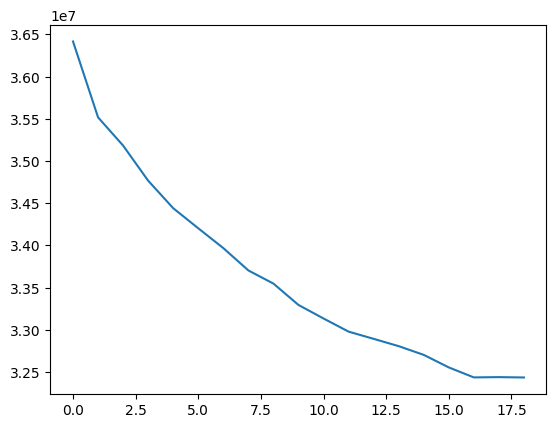

In [101]:
plt.plot(range(len(inertias)), inertias.values())
plt.show()

In [106]:
clusters = "6"
ratings_train = pd.concat([ids_w_clusters[clusters], ratings_train], axis=1)
ratings_train

,6,user_id,19,43,49,51,66,80,100,126,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
0,3,2,0,0,0,3,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,20,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,23,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,2,876041,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44276,2,876048,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44277,2,876056,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44278,2,876124,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
isbn_mapper = pd.DataFrame()

chunk_size = 100000
books_json = pd.read_json("data/goodreads_books.json", lines=True, chunksize=chunk_size)
i = 1
for chunk in books_json:
    temp = chunk[['isbn', 'book_id', 'title']]
    isbn_mapper = isbn_mapper.append(temp)
    print(i*chunk_size       , end="\r")
    i += 1
isbn_mapper


,isbn,book_id,title
0,0312853122,5333265,W.C. Fields: A Life on Film
1,0743509986,1333909,Good Harbor
2,,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,6066819,Best Friends Forever
4,0850308712,287140,Runic Astrology: Starcraft and Timekeeping in ...
...,...,...,...
2360650,0563553014,3084038,"This Sceptred Isle, Vol. 10: The Age of Victor..."
2360651,178092870X,26168430,Sherlock Holmes and the July Crisis
2360652,0765197456,2342551,The Children's Classic Poetry Collection
2360653,162378140X,22017381,"101 Nights: Volume One (101 Nights, #1-3)"


In [129]:
isbn_mapper.to_csv("isbn_mapper.csv", index=False)

In [153]:
isbn_mapper[isbn_mapper["book_id"] == 1000]

,isbn,book_id,title
1528792,0740745328,1000,Millionaire Women Next Door: The Many Journeys...


In [174]:
cluster_top_books = pd.DataFrame({"isbn":[], "book_id":[], 'title':[], "cluster": []})
for k, grouped_df in ratings_train.groupby(clusters):
    book_sums = pd.DataFrame(grouped_df.iloc[:,2:].sum())
    book_sums = book_sums.sort_values(0, ascending=False)
    for book_id, row in book_sums.head(10).iterrows():
        book_info = isbn_mapper[isbn_mapper["book_id"] == int(book_id)]
        book_info = pd.concat([pd.DataFrame(book_info), pd.DataFrame({"cluster":[int(k)]})], axis=1)
        cluster_top_books = cluster_top_books.append(book_info)
        print(cluster_top_books)


               isbn  book_id  \
0               NaN      NaN   
1528792  0740745328   1000.0   

                                                     title  cluster  
0                                                      NaN      0.0  
1528792  Millionaire Women Next Door: The Many Journeys...      NaN  
               isbn  book_id  \
0               NaN      NaN   
1528792  0740745328   1000.0   
0               NaN      NaN   
2198765                536.0   

                                                     title  cluster  
0                                                      NaN      0.0  
1528792  Millionaire Women Next Door: The Many Journeys...      NaN  
0                                                      NaN      0.0  
2198765                                   The Lovely Bones      NaN  
               isbn  book_id  \
0               NaN      NaN   
1528792  0740745328   1000.0   
0               NaN      NaN   
2198765                536.0   
0               NaN   

In [185]:
cluster_top_books = pd.DataFrame(columns=["isbn", "book_id", "title", "cluster"])
for k, grouped_df in ratings_train.groupby(clusters):
    book_sums = grouped_df.iloc[:, 2:].sum().to_frame(name='total')
    book_sums = book_sums.sort_values(by='total', ascending=False)
    for book_id, row in book_sums.head(50).iterrows():
        book_info = isbn_mapper[isbn_mapper["book_id"] == int(book_id)].copy()
        book_info['cluster'] = int(k)
        cluster_top_books = pd.concat([cluster_top_books, book_info], ignore_index=True)
cluster_top_books

,isbn,book_id,title,cluster
0,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,0
1,,536,The Lovely Bones,0
2,0449146979,66,"The Changeling (Daughters of England, #15)",0
3,0060777303,1116,"The Devil's Broker: Seeking Gold, God, and Glo...",0
4,0971784361,6398,Light a Candle,0
...,...,...,...,...
145,1411401018,12966,Much Ado About Nothing (No Fear Shakespeare),5
146,0764585991,1386,Cliffs Notes on Homer's The Odyssey,5
147,0713998946,706,America (The Book): A Citizen's Guide to Democ...,5
148,0739462563,1203,Freakonomics: A Rogue Economist Explores The H...,5


In [186]:
cluster_top_books.to_csv("top_books_per_cluster.csv", index=False)

In [209]:
temp = pd.DataFrame({"cluster":ids_w_clusters["5"]})

In [210]:
pca_comp_with_clusters = pd.concat([train_ids["user_id"],temp, pca_comp_599], axis=1)

In [211]:
pca_comp_with_clusters

,user_id,cluster,0,1,2,3,4,5,6,7,...,589,590,591,592,593,594,595,596,597,598
0,2,3,4.085003,-5.522683,-3.036081,6.126449,-0.740981,-1.102540,-2.722930,-1.609956,...,0.736044,1.152837,-0.833796,-0.196830,0.244423,0.749745,0.357545,1.110399,0.702663,0.543856
1,7,2,-3.347378,-0.741573,-1.252541,0.842313,0.225592,-0.854332,0.727979,0.621243,...,0.535555,-0.040235,0.622489,-0.625533,1.015147,-0.007480,-0.606828,-0.285400,0.919834,0.749883
2,8,1,12.483160,-11.539247,0.498742,-3.415512,12.255275,7.642737,-4.085023,-3.511905,...,2.142653,0.504826,-2.364900,0.370847,-0.496489,1.293915,0.188079,-0.283045,-1.439819,-0.978287
3,20,3,4.339653,-6.066673,9.282656,-9.425938,-2.123423,-1.275655,-4.469162,5.027890,...,-0.627380,-0.447955,-0.210242,-0.354352,-0.072410,0.730186,0.521419,0.144321,-0.937012,0.614752
4,23,2,-0.198886,3.082715,-2.667717,-3.741851,-0.096773,-4.407001,2.085496,0.975013,...,0.774911,1.561947,-0.731327,-1.149137,0.413043,-0.900197,0.310406,-0.677716,-0.847779,-0.269765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,876041,2,-2.083839,-2.653742,0.924319,-2.407967,-0.204075,0.504450,-0.008458,0.099927,...,-0.726304,-0.031333,-0.372959,-0.735998,1.862495,0.837032,0.631002,-1.965899,1.141799,-1.065669
44276,876048,2,-1.871878,-1.931700,-0.092445,1.102769,0.604245,-1.377491,1.622945,0.371585,...,-0.167950,-1.754474,-0.121207,0.542039,-0.555523,-0.061128,0.441934,0.573715,0.807748,0.532170
44277,876056,2,-3.970866,-1.330473,0.111523,-0.231471,-0.082445,-1.055535,0.516510,0.441322,...,-0.238865,0.057319,0.020026,-0.541851,0.509633,0.190191,-0.939911,0.039639,-0.579603,1.259170
44278,876124,2,-5.121131,-1.877299,0.085378,-0.737272,1.336235,1.036244,-0.778424,-1.355164,...,0.777897,0.015502,-0.380649,0.457218,-0.306262,0.385057,-0.493709,-1.477547,0.826588,-0.203049


In [200]:
pca_comp_with_clusters.sample(5000).to_csv("reduced_pca_components.csv", index=False)

In [215]:
from sklearn.manifold import TSNE

In [213]:
def plot_tsne(cluster_string):
    temp = pd.DataFrame({"cluster":ids_w_clusters[cluster_string]})
    pca_comp_with_clusters = pd.concat([train_ids["user_id"],temp, pca_comp_599], axis=1)
    temp = pca_comp_with_clusters.sample(3000, random_state=15)
    pca_components = temp.drop(columns=['user_id', 'cluster'])
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(pca_components)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=temp['cluster'], cmap='jet', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('t-SNE visualization of clusters')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True)
    plt.show()

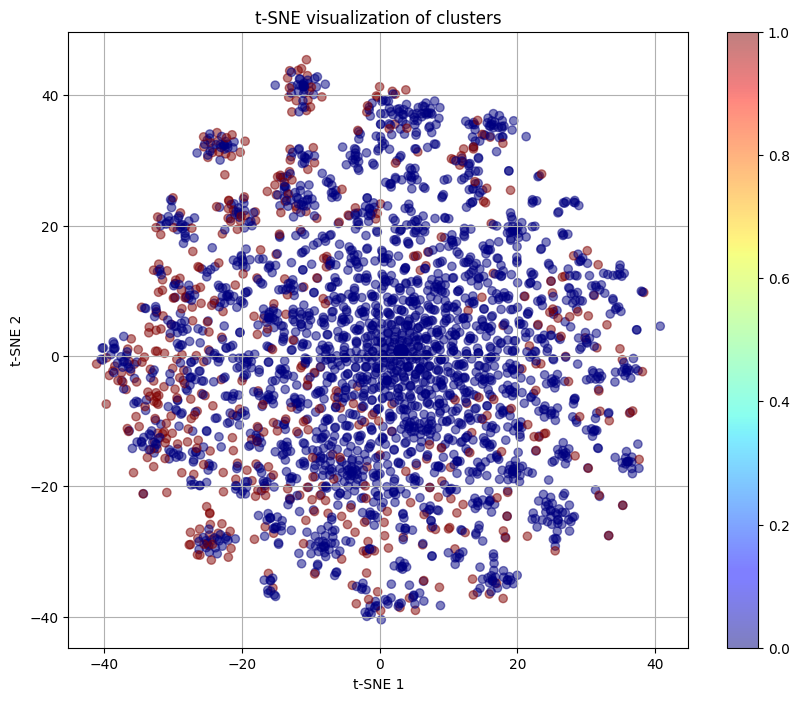

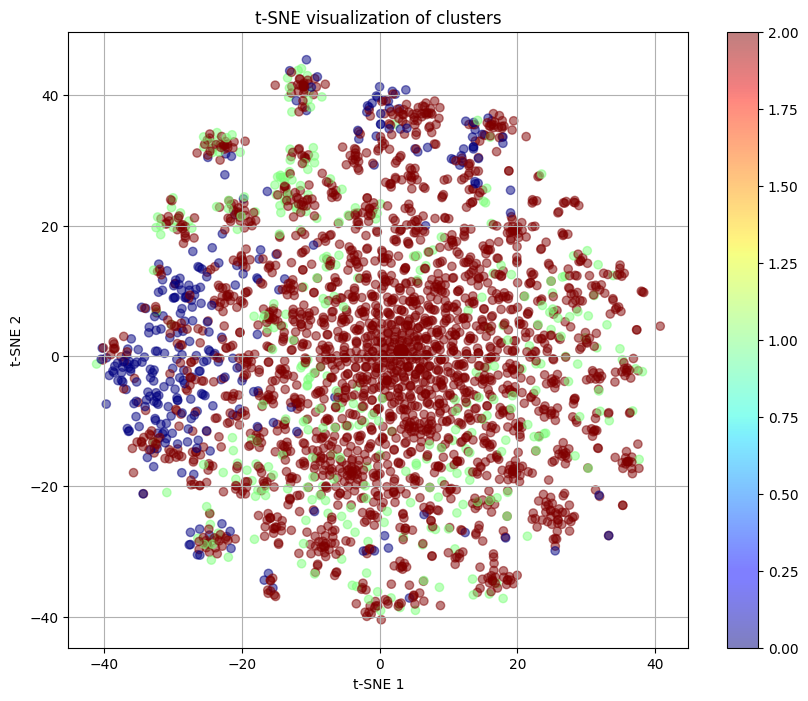

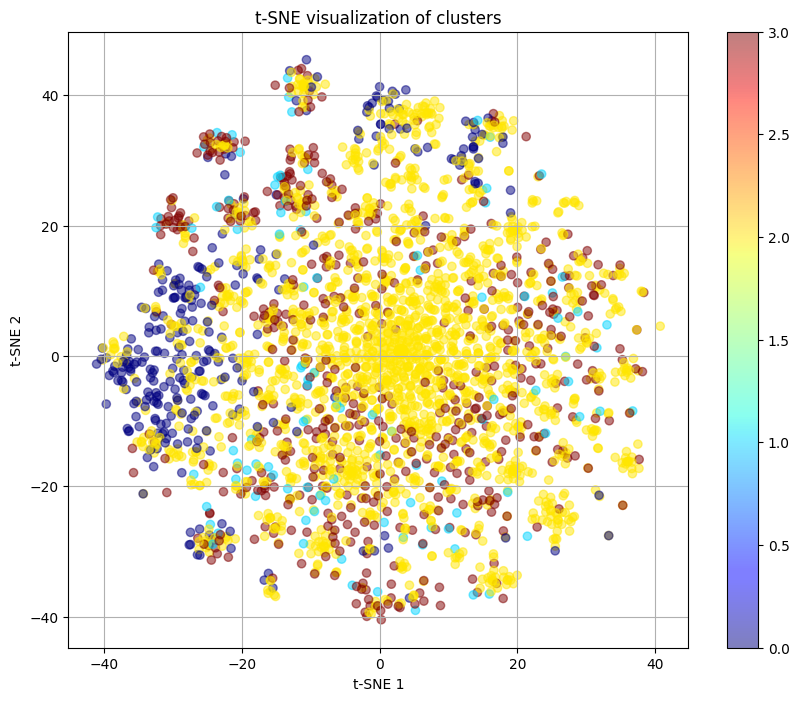

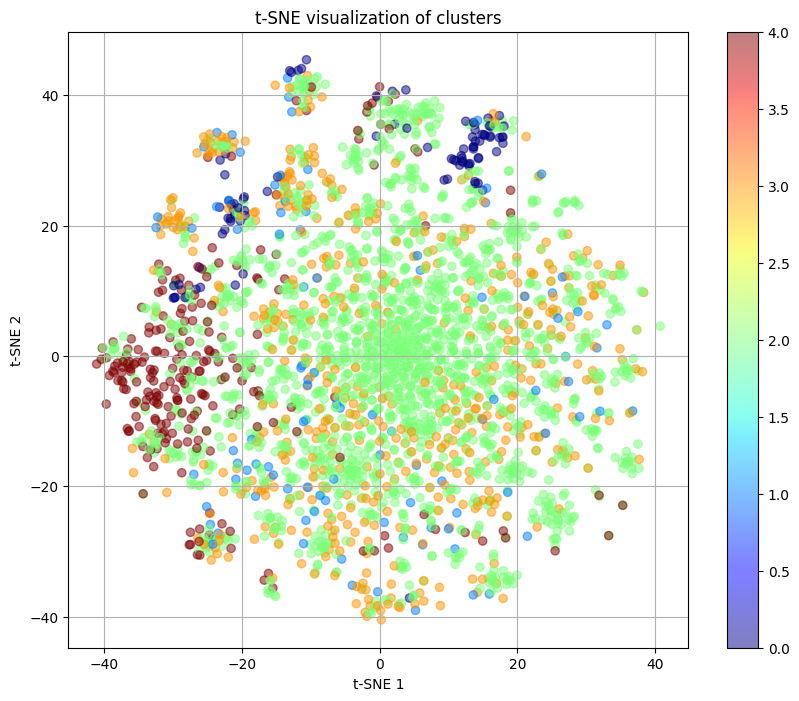

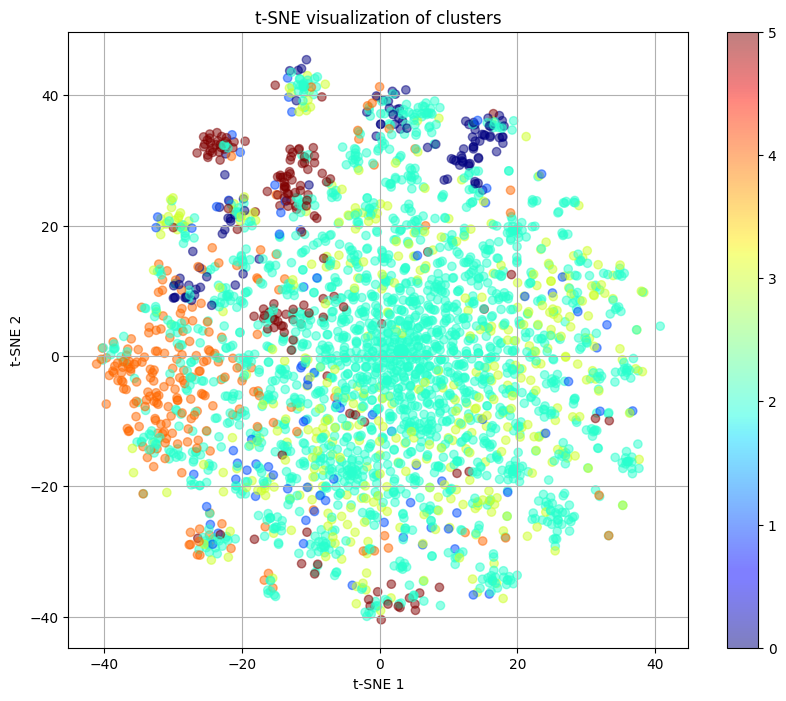

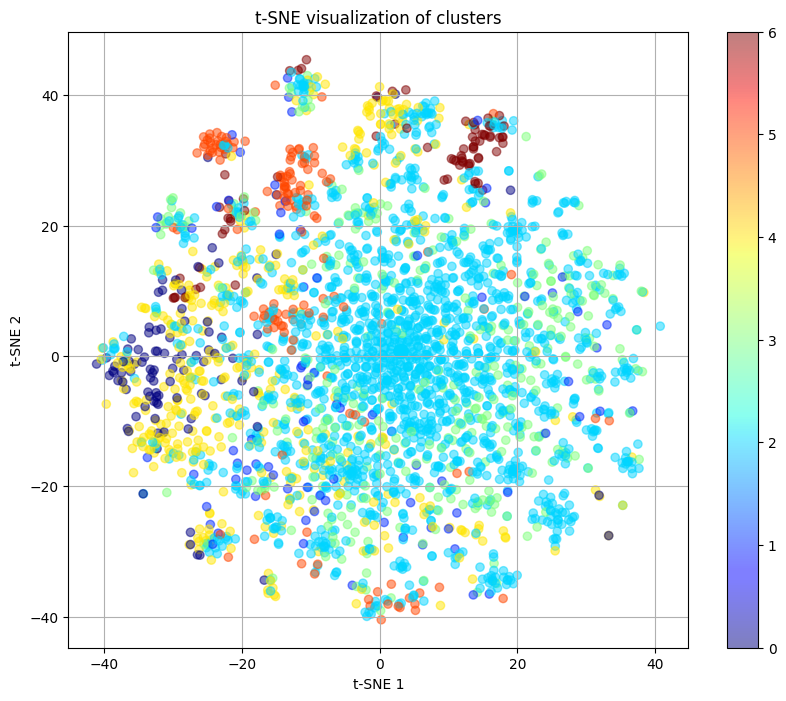

In [214]:
for i in ["2", "3", "4", "5", "6", "7"]:
    plot_tsne(i)

In [232]:
genres = pd.read_json("data/goodreads_book_genres_initial.json", 'r', lines=True)
genres

/var/folders/z9/9fp5jhgs2bj9rb5803bf8zmw0000gn/T/ipykernel_43576/4126614458.py:1: FutureWarning: Starting with Pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only
  genres = pd.read_json("data/goodreads_book_genres_initial.json", 'r', lines=True)


,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [241]:
genres[genres["book_id"] == 2590]["genres"]

695857    {'non-fiction': 4001, 'history, historical fic...
Name: genres, dtype: object

In [221]:
cluster_top_books

,isbn,book_id,title,cluster
0,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,0
1,,536,The Lovely Bones,0
2,0449146979,66,"The Changeling (Daughters of England, #15)",0
3,0060777303,1116,"The Devil's Broker: Seeking Gold, God, and Glo...",0
4,0971784361,6398,Light a Candle,0
...,...,...,...,...
145,1411401018,12966,Much Ado About Nothing (No Fear Shakespeare),5
146,0764585991,1386,Cliffs Notes on Homer's The Odyssey,5
147,0713998946,706,America (The Book): A Citizen's Guide to Democ...,5
148,0739462563,1203,Freakonomics: A Rogue Economist Explores The H...,5


In [222]:
cluster_top_books_g = pd.merge(cluster_top_books, genres, how="inner", on="book_id")
cluster_top_books_g

,isbn,book_id,title,cluster,genres
0,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,0,"{'non-fiction': 26, 'history, historical ficti..."
1,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,2,"{'non-fiction': 26, 'history, historical ficti..."
2,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,3,"{'non-fiction': 26, 'history, historical ficti..."
3,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,4,"{'non-fiction': 26, 'history, historical ficti..."
4,,536,The Lovely Bones,0,"{'fiction': 10815, 'mystery, thriller, crime':..."
...,...,...,...,...,...
145,0976072696,2590,The Art of War by Sun Tzu,5,"{'non-fiction': 4001, 'history, historical fic..."
146,1589880293,6360,"Rocky Stories: Tales of Love, Hope, and Happin...",5,{'non-fiction': 1}
147,1411401018,12966,Much Ado About Nothing (No Fear Shakespeare),5,"{'fiction': 1162, 'romance': 483, 'poetry': 31..."
148,0713998946,706,America (The Book): A Citizen's Guide to Democ...,5,"{'non-fiction': 1329, 'history, historical fic..."


In [224]:
cluster_top_books_g = cluster_top_books_g.sort_values(by='cluster')
cluster_top_books_g

,isbn,book_id,title,cluster,genres
0,0740745328,1000,Millionaire Women Next Door: The Many Journeys...,0,"{'non-fiction': 26, 'history, historical ficti..."
30,0664226108,7341,The Gospel According to Tolkien: Visions of th...,0,"{'non-fiction': 32, 'fantasy, paranormal': 15,..."
31,081221627X,1526,The Oresteia: Agamemnon/The Libation Bearers/T...,0,"{'fiction': 270, 'poetry': 139, 'history, hist..."
33,0764585991,1386,Cliffs Notes on Homer's The Odyssey,0,"{'history, historical fiction, biography': 2, ..."
39,1401906486,6402,If You Could See What I See: The Tenets of Nov...,0,"{'non-fiction': 9, 'fantasy, paranormal': 6}"
...,...,...,...,...,...
46,1932664394,941,Love As A Foreign Language #5,5,"{'comics, graphic': 2}"
38,0764585991,1386,Cliffs Notes on Homer's The Odyssey,5,"{'history, historical fiction, biography': 2, ..."
21,0802415075,943,Marriage Special Package- 2 books- Five Love L...,5,{'non-fiction': 3}
112,0071422579,996,What Every Real Estate Investor Needs to Know ...,5,"{'non-fiction': 10, 'history, historical ficti..."


In [231]:
cluster_genres = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
for i, row in cluster_top_books_g.iterrows():
    genres1 = dict(row["genres"]).keys()
    cluster_genres[int(row["cluster"])].extend(genres1)

cluster_genres

{0: ['non-fiction',
  'history, historical fiction, biography',
  'non-fiction',
  'fantasy, paranormal',
  'fiction',
  'young-adult',
  'fiction',
  'poetry',
  'history, historical fiction, biography',
  'fantasy, paranormal',
  'history, historical fiction, biography',
  'fiction',
  'non-fiction',
  'fantasy, paranormal',
  'non-fiction',
  'fantasy, paranormal',
  'comics, graphic',
  'fiction',
  'poetry',
  'history, historical fiction, biography',
  'fantasy, paranormal',
  'non-fiction',
  'romance',
  'fiction',
  'history, historical fiction, biography',
  'romance',
  'fiction',
  'fantasy, paranormal',
  'romance',
  'poetry',
  'history, historical fiction, biography',
  'fiction',
  'mystery, thriller, crime',
  'history, historical fiction, biography',
  'fantasy, paranormal',
  'romance',
  'comics, graphic',
  'fiction',
  'history, historical fiction, biography',
  'young-adult',
  'romance',
  'fiction',
  'fantasy, paranormal',
  'history, historical fiction, biog

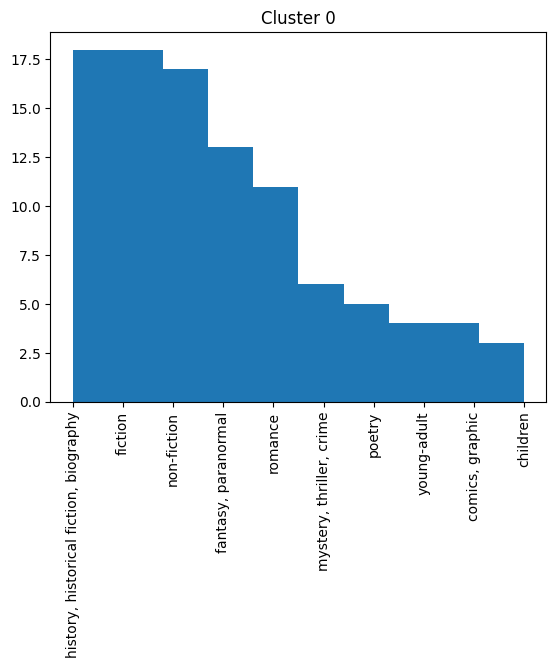

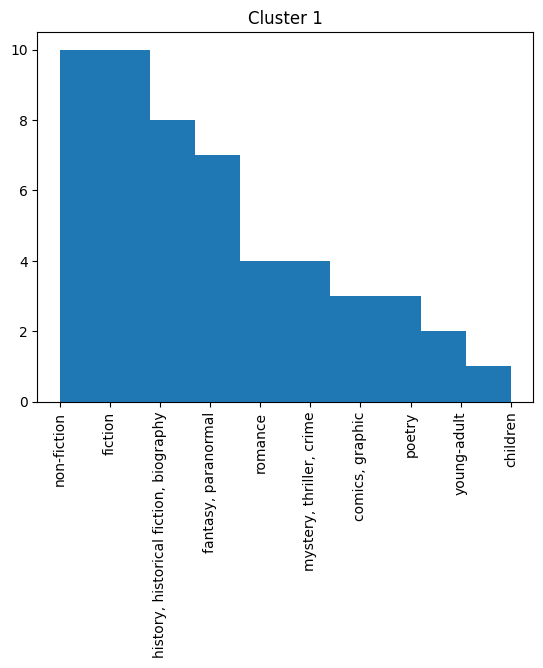

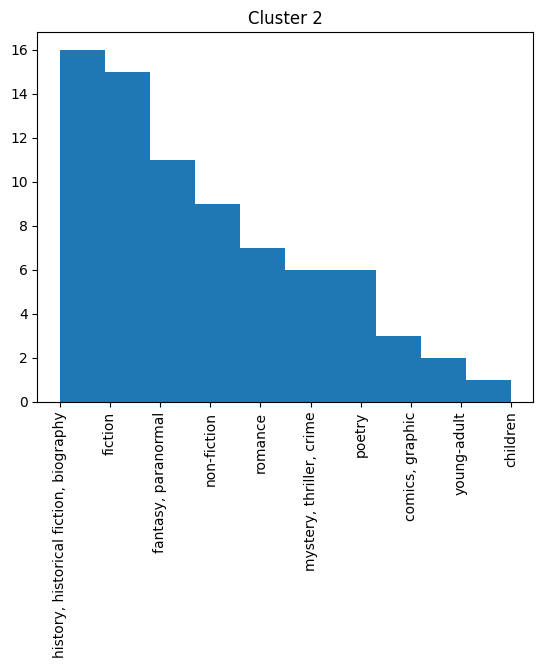

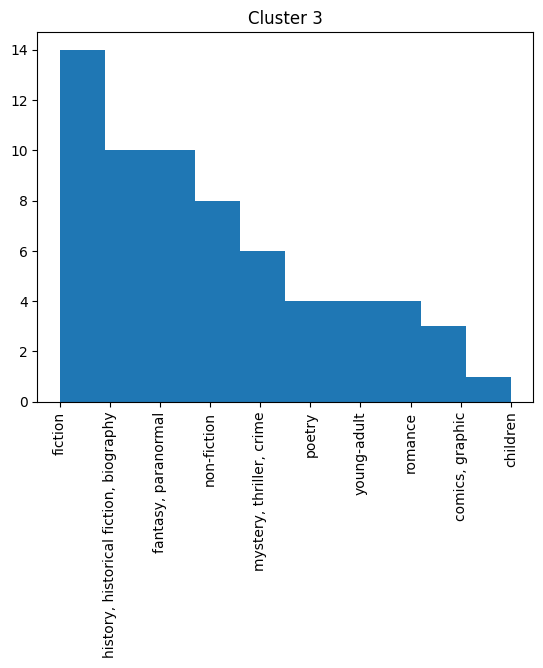

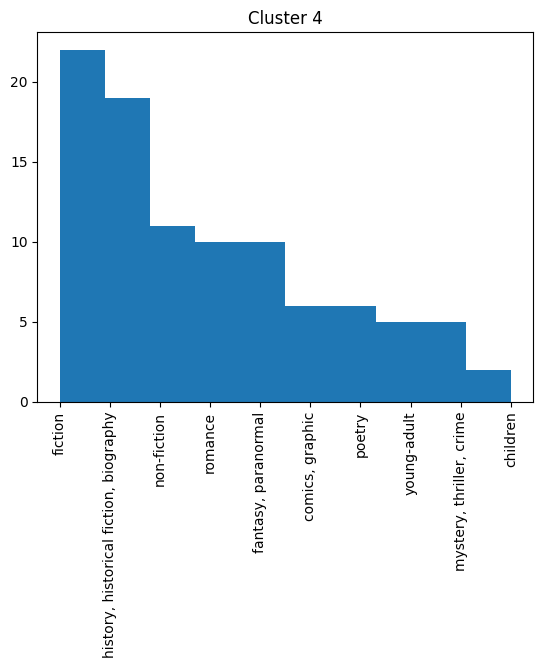

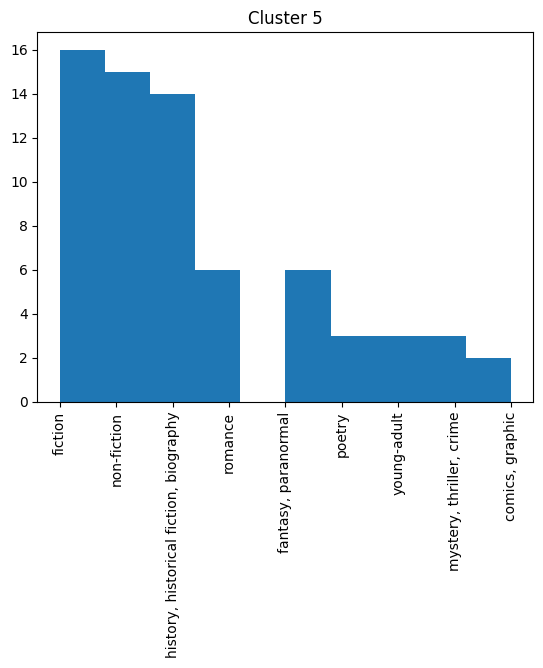

In [229]:
for i in range(0,6):
    plt.hist(sorted(cluster_genres[i], key=lambda x: cluster_genres[i].count(x), reverse=True))
    plt.xticks(rotation=90)
    plt.title(f"Cluster {i}")
    plt.show()